In [5]:
import numpy as np 
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

C:\Users\Beyza\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
f = open('hurriyet.txt', 'r', encoding='utf8')
text = f.read()
t_list = text.split('\n')
corpus = []

for cumle in t_list:
    corpus.append(cumle.split())

In [3]:
print(corpus[:15])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

Öncelikle corpusları elde ettik şimdi modeli eğitelim

In [7]:
model = Word2Vec(corpus, vector_size=100, window=5, min_count=5, sg=1)

In [8]:
model.wv['istanbul']

array([ 0.10260615, -0.3270565 , -0.0412914 ,  0.19722748,  0.71298033,
       -0.13779157,  0.10502204,  0.22984472, -0.19049601, -0.06486925,
       -0.31987724, -0.13719513,  0.51039493,  0.01410311, -0.310505  ,
        0.34283066,  0.3453068 , -0.30933326,  0.31498364, -0.32541353,
        0.20204067, -0.02794138,  0.3862895 , -0.8264215 , -0.536333  ,
        0.12971486, -0.43562904,  0.23716271, -0.25054076,  0.3307461 ,
        0.27569813, -0.16295324, -0.44917724, -0.06464071, -0.01914201,
       -0.14389917, -0.10256766, -0.27481103,  0.13558117, -0.9311914 ,
        0.3394014 ,  0.15509345,  0.34505397,  0.27899435,  0.05160965,
        0.48318133,  0.10157783, -0.47344163,  0.4852052 , -0.2175434 ,
        0.3124444 , -0.03142588,  0.22900712,  0.32480454, -0.50558347,
        0.43702164, -0.3131934 , -0.10632113, -0.6464016 , -0.48480025,
       -0.19730942,  0.1593285 , -0.16345622,  0.25997743, -0.13006301,
        0.04744842, -0.2219654 ,  0.4283642 , -0.6049557 , -0.05

In [9]:
model.wv.most_similar('belçika')

[('hollanda', 0.8143526911735535),
 ('danimarka', 0.7860254645347595),
 ('avusturya', 0.7633463144302368),
 ('fransa', 0.7521408200263977),
 ('almanya', 0.7228807210922241),
 ('ispanya', 0.7039064764976501),
 ('letonya', 0.6961701512336731),
 ('finlandiya', 0.6859968900680542),
 ('lüksemburg', 0.6750128269195557),
 ('estonya', 0.670030951499939)]

In [10]:
model.save('word2vec.model')

In [11]:
model = Word2Vec.load('word2vec.model')

Şimdi yazacağımız fonksiyon ile benzer kelimleri grafik üzerinde göreceğiz

In [15]:
def closestwords_tsneplot(model, word):
    word_vectors =np.empty((0,100))
    word_labels = [word]
    close_words = model.wv.most_similar(word)
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:,0]
    y_coords = Y[:,1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x,y), xytext=(5,-2), textcoords='offset points')
        
    plt.show()    

C:\Users\Beyza\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Beyza\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


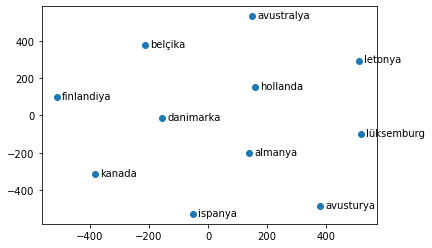

In [17]:
closestwords_tsneplot(model, 'hollanda')